# Import libraries

In [56]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,accuracy_score
from typing import Literal
import pickle

# EDA

In [2]:
df = pd.read_csv("data/Student Depression Dataset.csv")
df.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [3]:
df.shape

(27901, 18)

In [4]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
def clean_df(df):
    df = df[df["Profession"] == "Student"]
    df = df.drop(columns=["id", "City", "Job Satisfaction", "Profession", 'Work Pressure'])

    return df

In [8]:
df_clean = clean_df(df)

In [9]:
df_clean.shape

(27870, 13)

In [10]:
df_clean.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

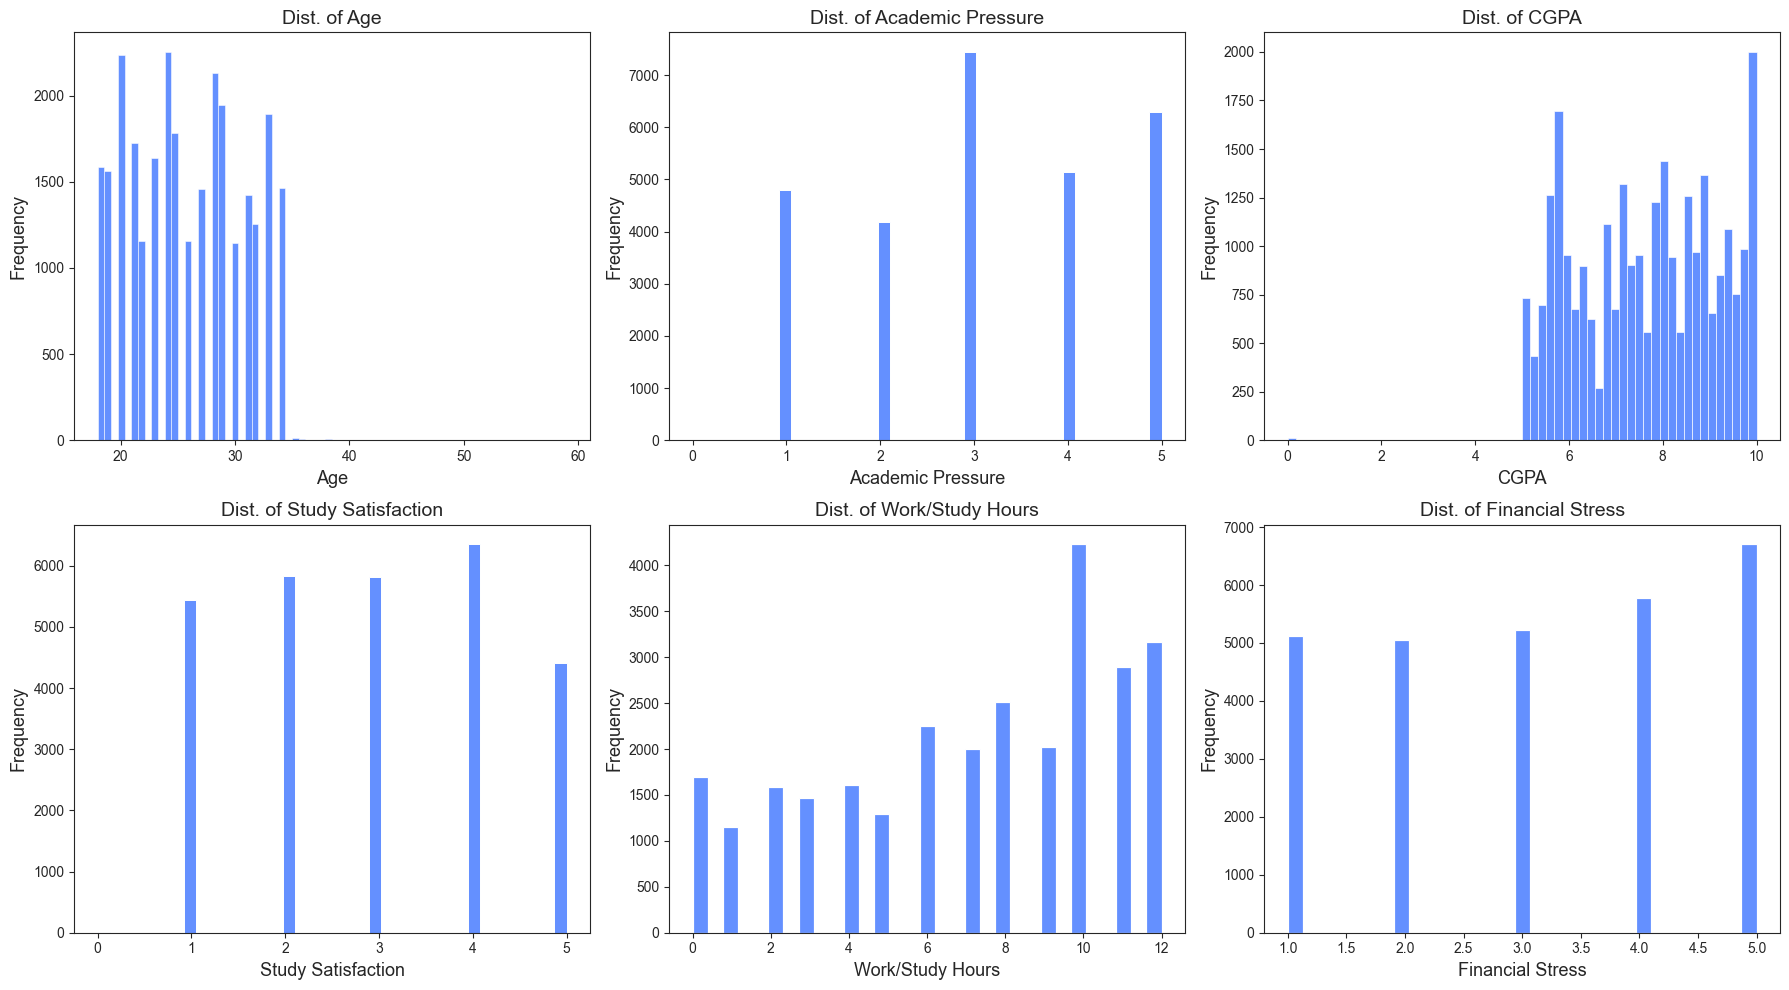

In [64]:
numerical_cols = ["Age", 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                  'Work/Study Hours', 'Financial Stress']

total_plots = len(numerical_cols)
n_cols = 3
n_rows = (total_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_clean, x=col, ax=axes[i], color="#306bff")
    axes[i].set_title(f'Dist. of {col}', fontsize=14)
    axes[i].set_xlabel(f"{col}", fontsize=13)
    axes[i].set_ylabel("Frequency", fontsize=13)

for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.savefig("visualizations/num_dist.png", dpi=300)
plt.show()

C:\Users\Hiep\AppData\Local\Temp\ipykernel_19920\1219924757.py:18: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df_clean, x=col, ax=axes[idx], palette=BLUE_PALETTE, hue=col, legend=False)
C:\Users\Hiep\AppData\Local\Temp\ipykernel_19920\1219924757.py:18: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df_clean, x=col, ax=axes[idx], palette=BLUE_PALETTE, hue=col, legend=False)
C:\Users\Hiep\AppData\Local\Temp\ipykernel_19920\1219924757.py:18: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_clean, x=col, ax=axes[idx], palette=BLUE_PALETTE, hue=col, legend=False)
C:\Users\Hiep\AppData\Local\Temp\ipykernel_19920\1219924757.py:18: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df_clean, x

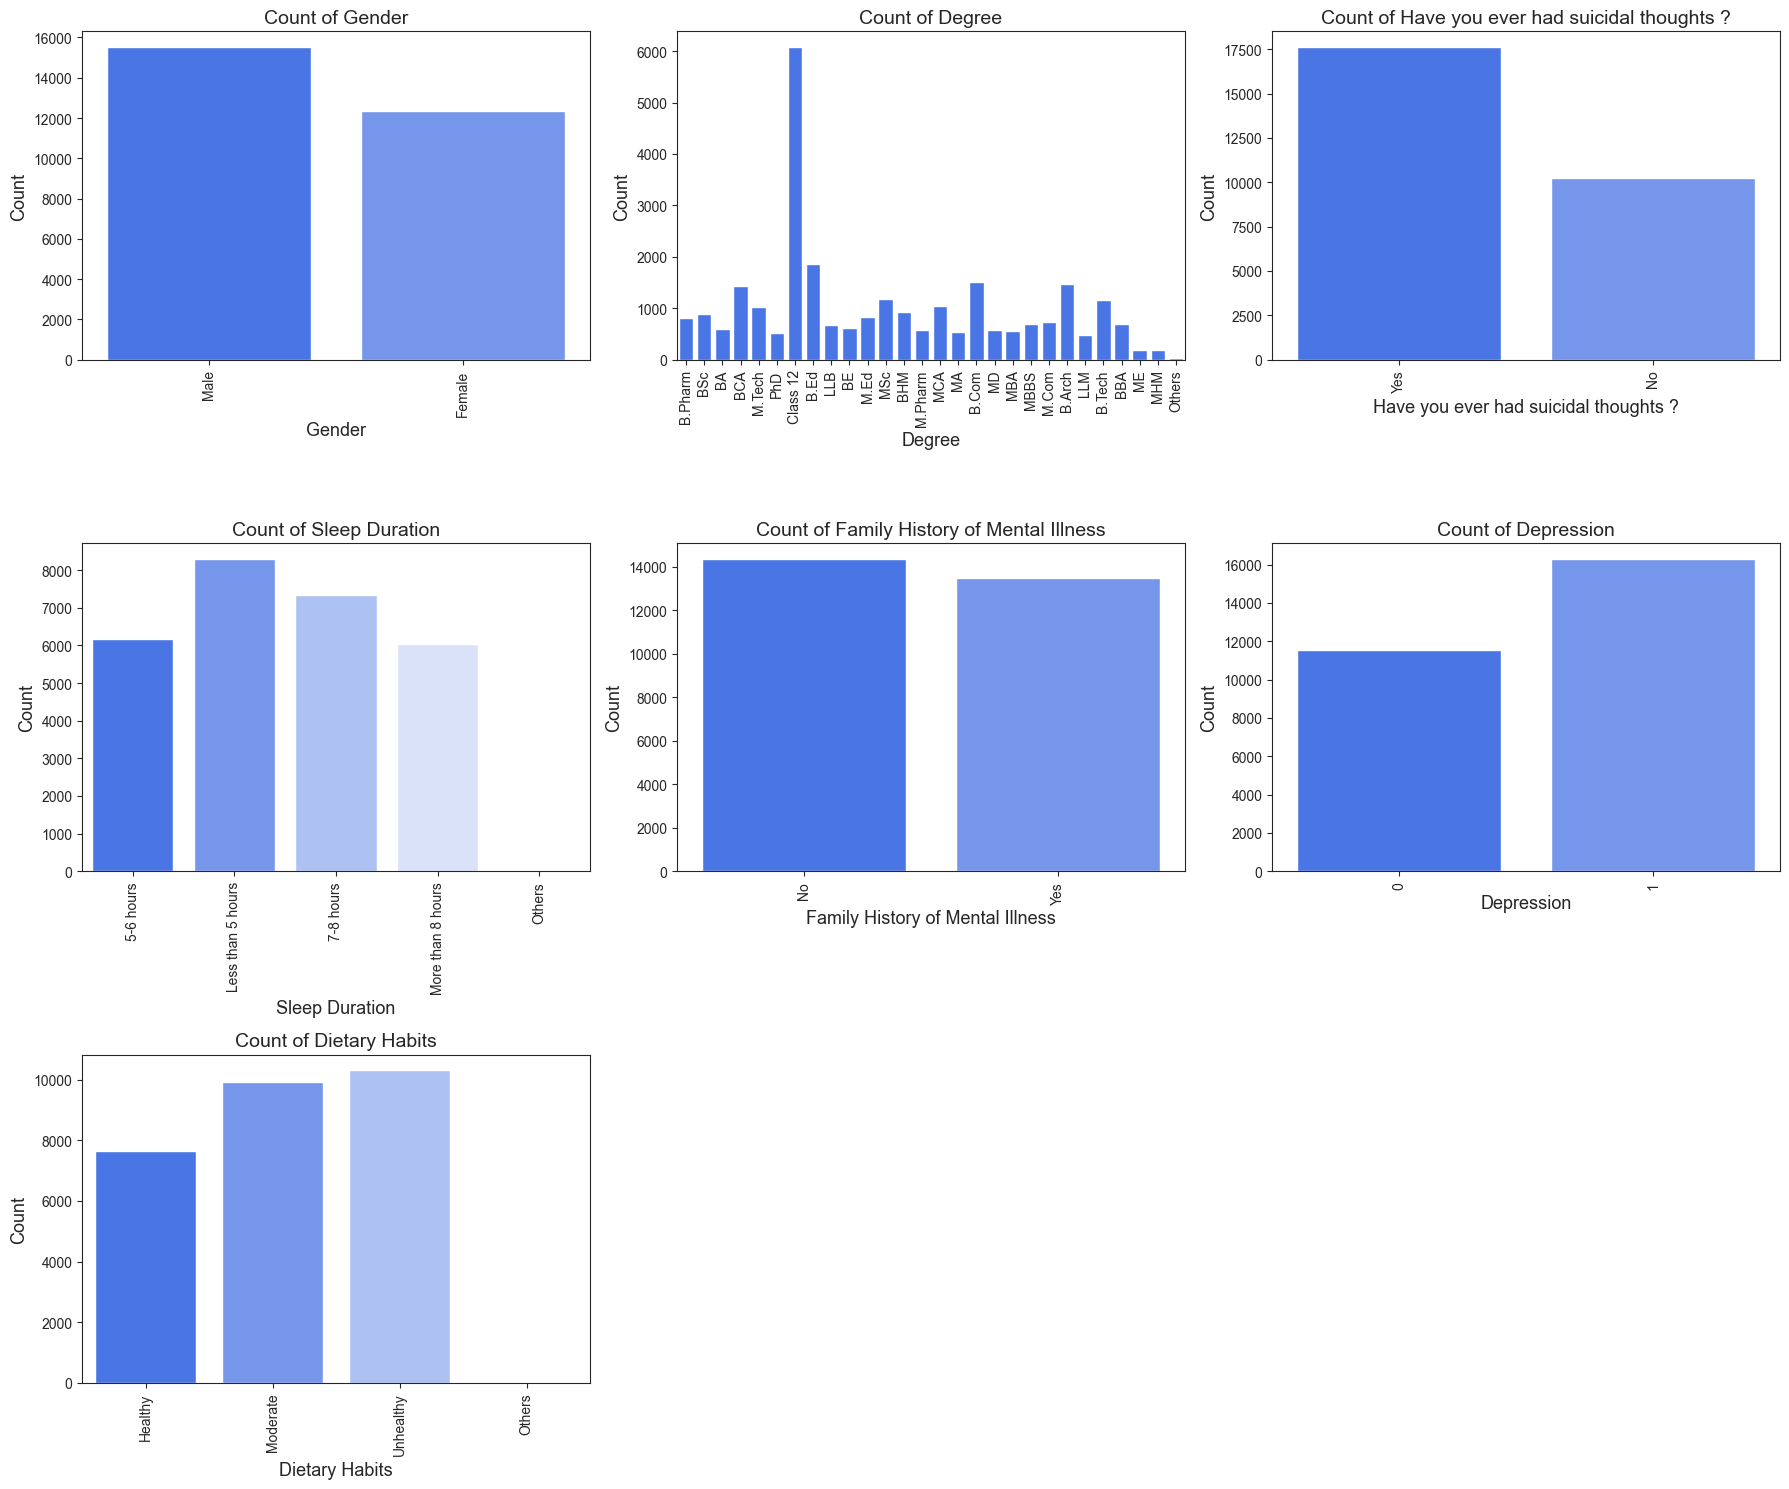

In [70]:
BLUE_PALETTE = ["#306bff", "#618efe", "#a1bcfe",'#d3dfff']

categorical_cols = ["Gender", "Degree", 'Have you ever had suicidal thoughts ?', 'Sleep Duration',
                    'Family History of Mental Illness', 'Depression', 'Dietary Habits']
sns.set_style("ticks")

total_plots =  len(categorical_cols)
n_cols = 3
n_rows = (total_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if col == 'Degree':
        sns.countplot(data=df_clean, x=col, ax=axes[idx], color="#306bff")
    else:
        sns.countplot(data=df_clean, x=col, ax=axes[idx], palette=BLUE_PALETTE, hue=col, legend=False)

    axes[idx].set_xlabel(f"{col}", fontsize=13)
    axes[idx].set_ylabel("Count", fontsize=13)
    axes[idx].set_title(f'Count of {col}', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=90)

for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()

plt.savefig('visualizations/cat_count.png')
# Removed plt.show()

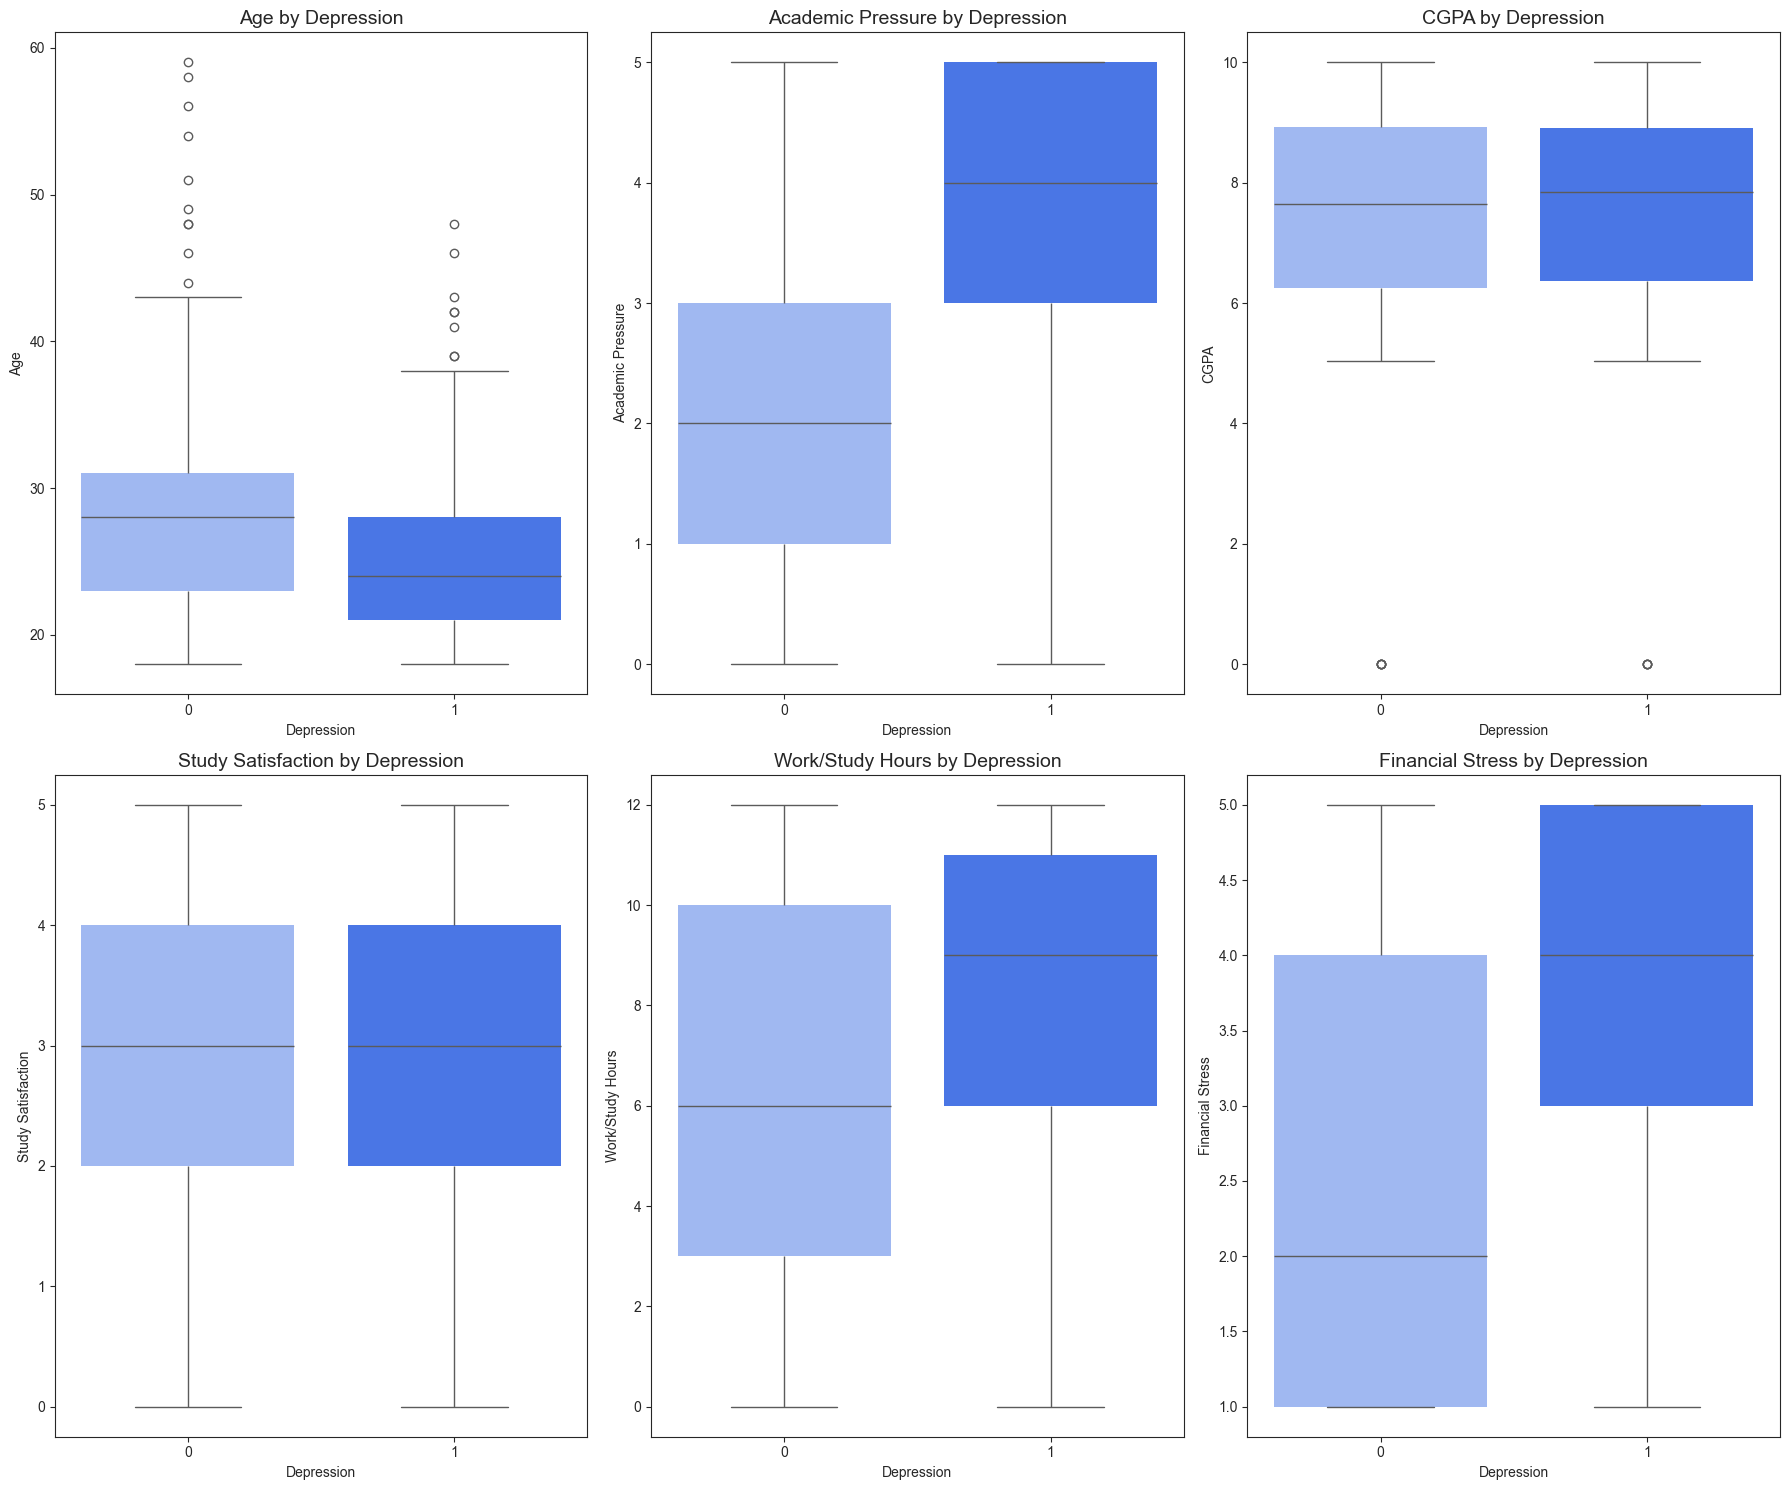

In [69]:
numerical_cols = ["Age", 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

BLUE_PALETTE = ['#93b2fe', "#306bff"]

fig1, axes1 = plt.subplots(2, 3, figsize=(18, 15))
axes1 = axes1.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Depression', y=col, data=df, ax=axes1[i], palette=BLUE_PALETTE, hue="Depression", legend=False, boxprops={'edgecolor': 'none'})
    axes1[i].set_title(f'{col} by Depression', fontsize=14)
    axes[i].set_xlabel("Depression", fontsize=13)
    axes[i].set_ylabel(f"{col}", fontsize=13)

plt.tight_layout()
plt.savefig('visualizations/boxplots.png')
plt.show()

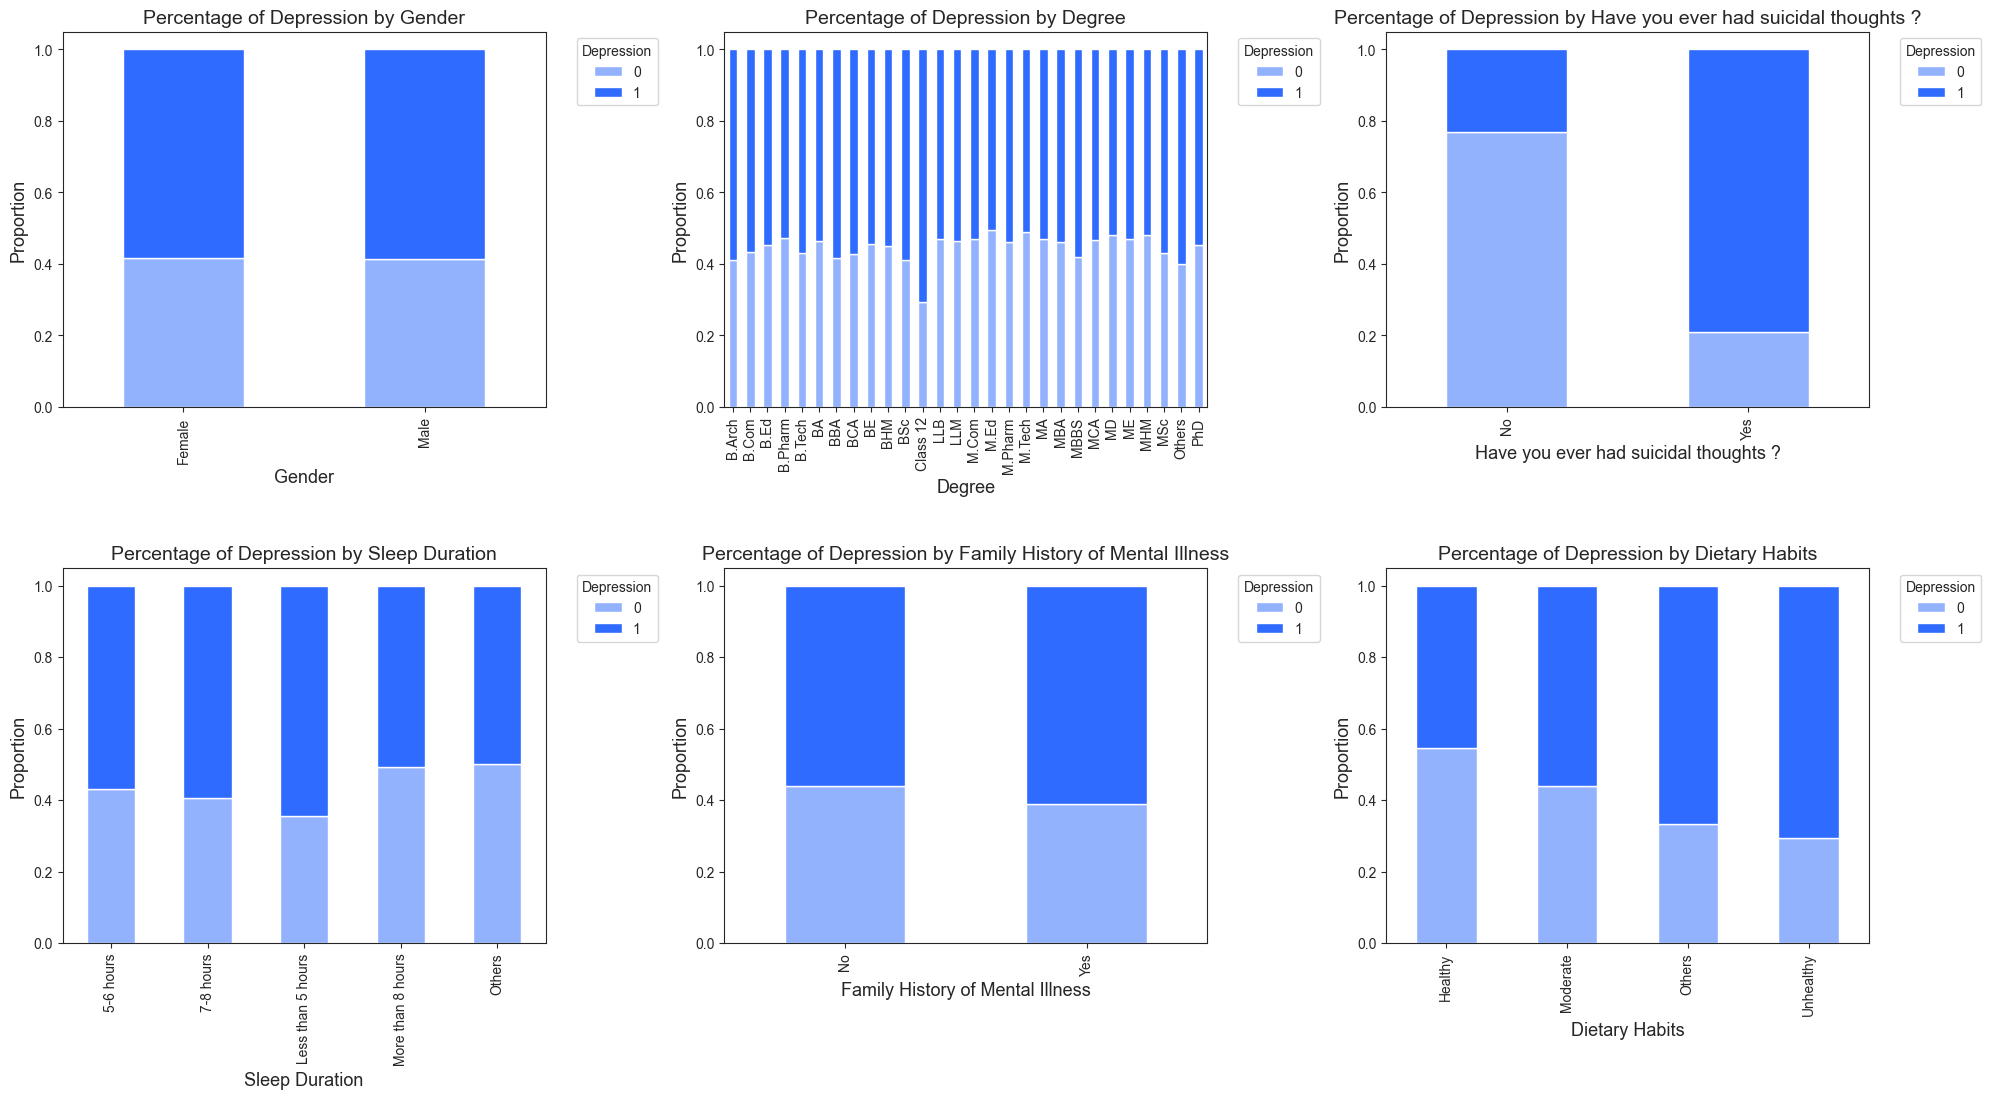

In [55]:
BLUE_PALETTE = ['#93b2fe', '#2f6bff']

categorical_cols = ["Gender", "Degree", 'Have you ever had suicidal thoughts ?', 'Sleep Duration',
                    'Family History of Mental Illness', 'Dietary Habits']

fig2, axes2 = plt.subplots(3, 3, figsize=(20, 15))
axes2 = axes2.flatten()

for i, col in enumerate(categorical_cols):
    props = pd.crosstab(df_clean[col], df_clean['Depression'], normalize='index')

    props.plot(kind='bar', stacked=True, ax=axes2[i], color=BLUE_PALETTE)

    axes2[i].set_title(f'Percentage of Depression by {col}', fontsize=14)
    axes2[i].set_ylabel('Proportion', fontsize=13)
    axes2[i].set_xlabel(f"{col}", fontsize=13)
    axes2[i].set_xlabel(col)
    axes2[i].tick_params(axis='x', rotation=90)

    axes2[i].legend(title='Depression', bbox_to_anchor=(1.05, 1), loc='upper left')

for k in range(len(categorical_cols), len(axes2)):
    fig2.delaxes(axes2[k])

plt.tight_layout()
plt.savefig('visualizations/cat_stacked_bar.png')

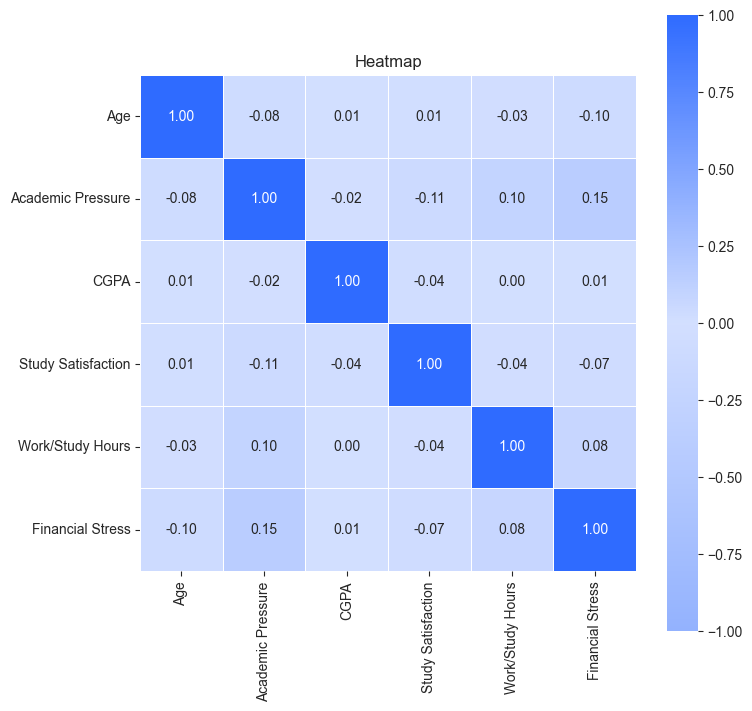

In [58]:
colors = ['#93b2fe', '#d3dfff', '#2f6bff']
BLUE_DIVERGING_CMAP = LinearSegmentedColormap.from_list('BlueThemeDiverging', colors, N=256)


df_encoded = df_clean[numerical_cols]

plt.figure(figsize=(8, 8))
corr = df_encoded.corr()


# MODIFIED: Changed cmap to the custom BLUE_DIVERGING_CMAP
sns.heatmap(corr, annot=True, fmt=".2f", cmap=BLUE_DIVERGING_CMAP,
            vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap')

plt.savefig('visualizations/correlation_heatmap.png')

# Preprocessing

In [15]:
numerical_cols = ["Age", 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                  'Work/Study Hours', 'Financial Stress']

categorical_cols = ["Gender", "Degree", 'Have you ever had suicidal thoughts ?', 'Sleep Duration',
                    'Family History of Mental Illness', 'Dietary Habits']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [16]:
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [17]:
filename = "preprocessor/preprocessor.pkl"
with open(filename, 'wb') as f:
    pickle.dump(preprocessor, f)

print("Preprocessor saved successfully!")

Preprocessor saved successfully!


# Evaluate

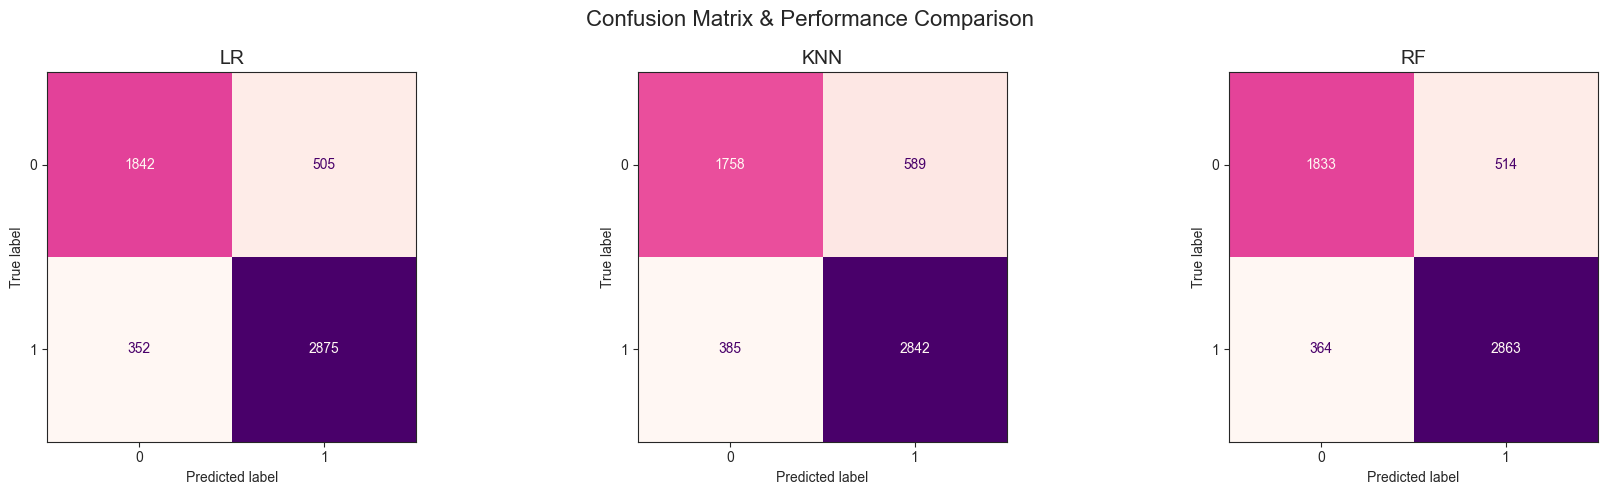


Model Performance Metrics:
  Model  Accuracy  Precision  Recall  F1 Score
0    LR    0.8463     0.8506  0.8909    0.8703
1   KNN    0.8253     0.8283  0.8807    0.8537
2    RF    0.8425     0.8478  0.8872    0.8671


In [18]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix & Performance Comparison', fontsize=16)

model_metrics = []

for ax, (name, clf) in zip(axes.flat, models.items()):
    clf.fit(X_train_processed, y_train)

    y_pred = clf.predict(X_test_processed)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    model_metrics.append({
        'Model': name,
        "Accuracy": acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

    disp.plot(ax=ax, cmap='RdPu', colorbar=False)

    ax.set_title(f"{name}", fontsize=14)
    ax.grid(False)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(model_metrics)
print("\nModel Performance Metrics:")
print(metrics_df.round(4))

# Inference

In [19]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    models[name] = model

In [20]:
for name, model in models.items():
    filename = f"models/{name}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

In [21]:
df_clean.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [22]:
def inference(model: Literal["LR", "KNN", "RF"], user_sample: dict):

    model_path_dict = {
        "LR": "models/LR.pkl",
        "KNN": "models/KNN.pkl",
        "RF": "models/RF.pkl"
    }
    id2label = {
        "1": "Yes",
        "0": "No"
    }
    try:
        user_sample_df = pd.DataFrame([user_sample])
        preprocessed_sample = preprocessor.transform(user_sample_df)
        model_path = model_path_dict[model]
        model = pickle.load(open(model_path, 'rb'))
        prediction = model.predict(preprocessed_sample)
    except Exception as e:
        print(f"An error occured: {e}")
        raise

    return id2label[f"{prediction[0].item()}"]

In [23]:
user_input = {
    'Gender': "Male",
    'Age': 18,
    'Academic Pressure': 2,
    'CGPA': 5,
    'Study Satisfaction': 3,
    'Sleep Duration': "5-6 hours",
    'Dietary Habits': "Healthy",
    'Degree': "BCA",
    'Have you ever had suicidal thoughts ?': "Yes",
    'Work/Study Hours': 9,
    'Financial Stress': 3,
    'Family History of Mental Illness': "Yes"
}

prediction = inference("KNN", user_input)
print(prediction)

Yes
